Prendere in analisi solo i valori numerici

\

**1. Analisi Univariata:** cercare e trattare outlier, valori nulli, valori settati a zero.

**2. Analisi Multivariata:** stabilire le relazioni tra le feature e la variabile da predirre. Descrivere le correlazioni del dataset.

**3. Split dei dati**

**4. Scala**

**5. Training**

**6. Training**

\


**Dataset:**
https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/carprice/carprice_data.csv



**Data description:**
https://github.com/FabioGagliardiIts/datasets/raw/main/carprice/carprice_data_dictionary.xlsx

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean   103.707921    0.841584   98.557921  173.658416   65.839109   53.701980   
std     59.382719    1.251727    5.774025   11.977926    2.072325    2.449773   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.250000    0.000000   94.500000  166.300000   64.025000   52.000000   
50%    104.500000    1.000000   96.900000  173.100000   65.500000   54.100000   
75%    154.750000    2.000000  101.200000  181.200000   66.500000   55.500000   
max    205.000000    3.000000  115.600000  202.600000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   202.000000  202.000000  202.000000  202.000000        202.000000   
mean   2539.089109  124.727723    3.323663    3.253812         10.174356   
std     505.785849   37.450068    0.267945

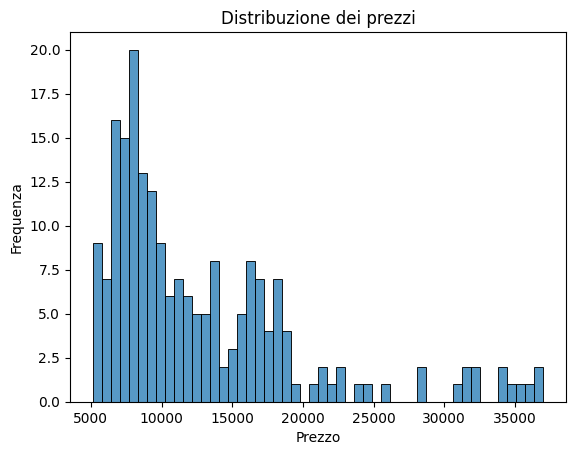

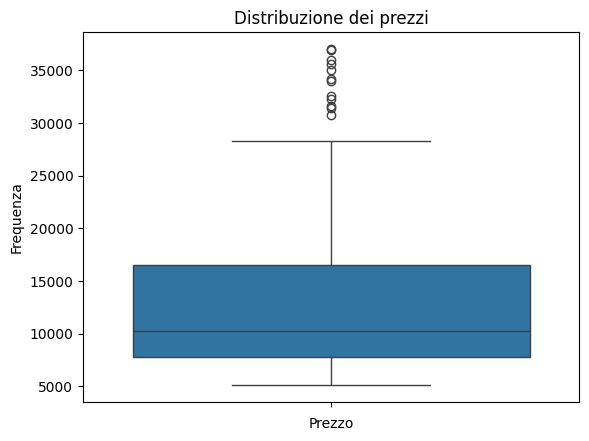

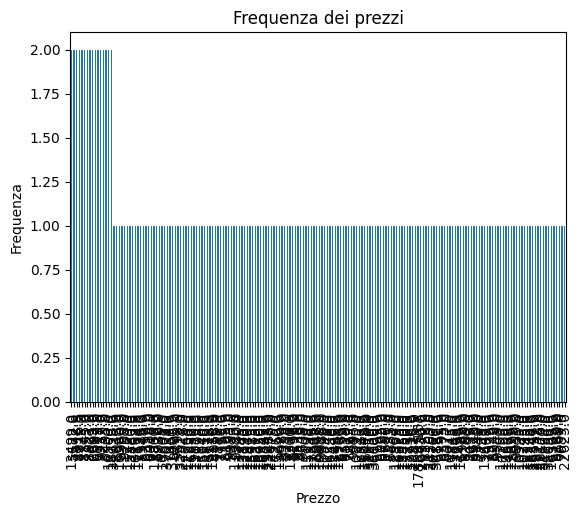

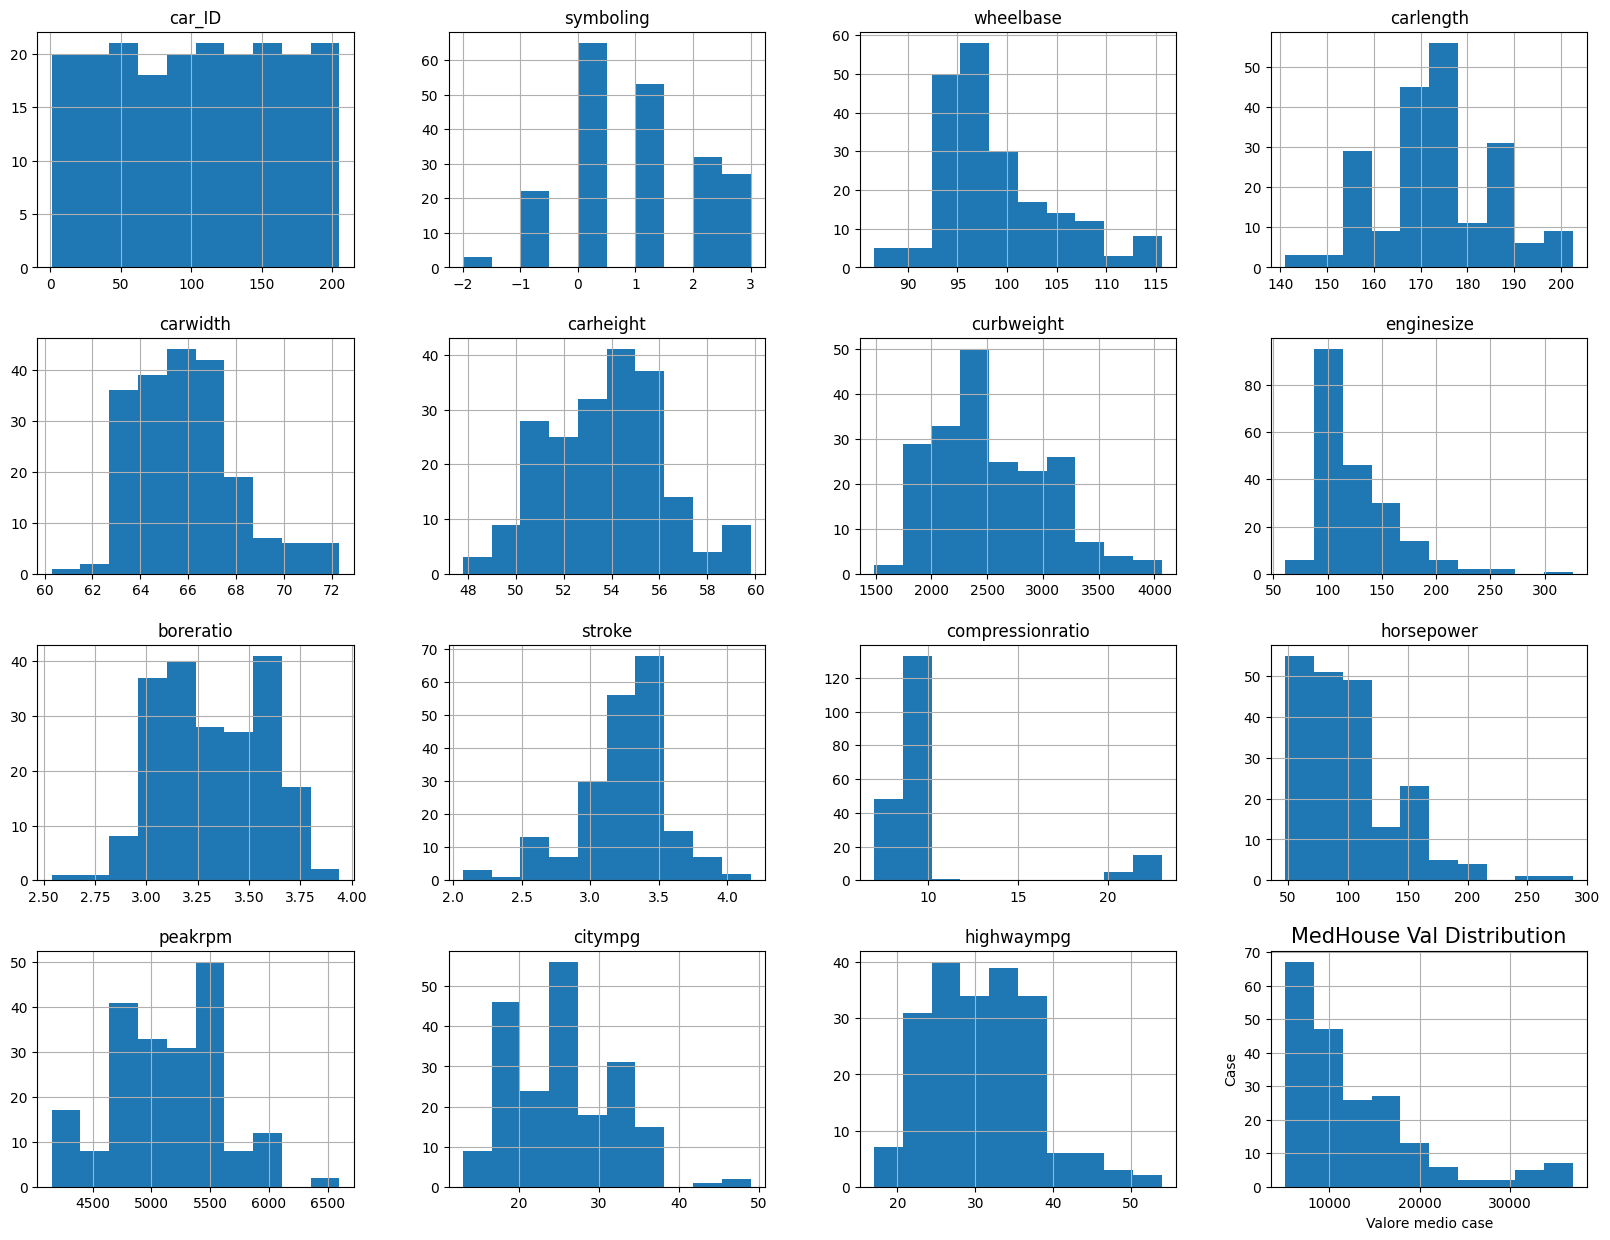

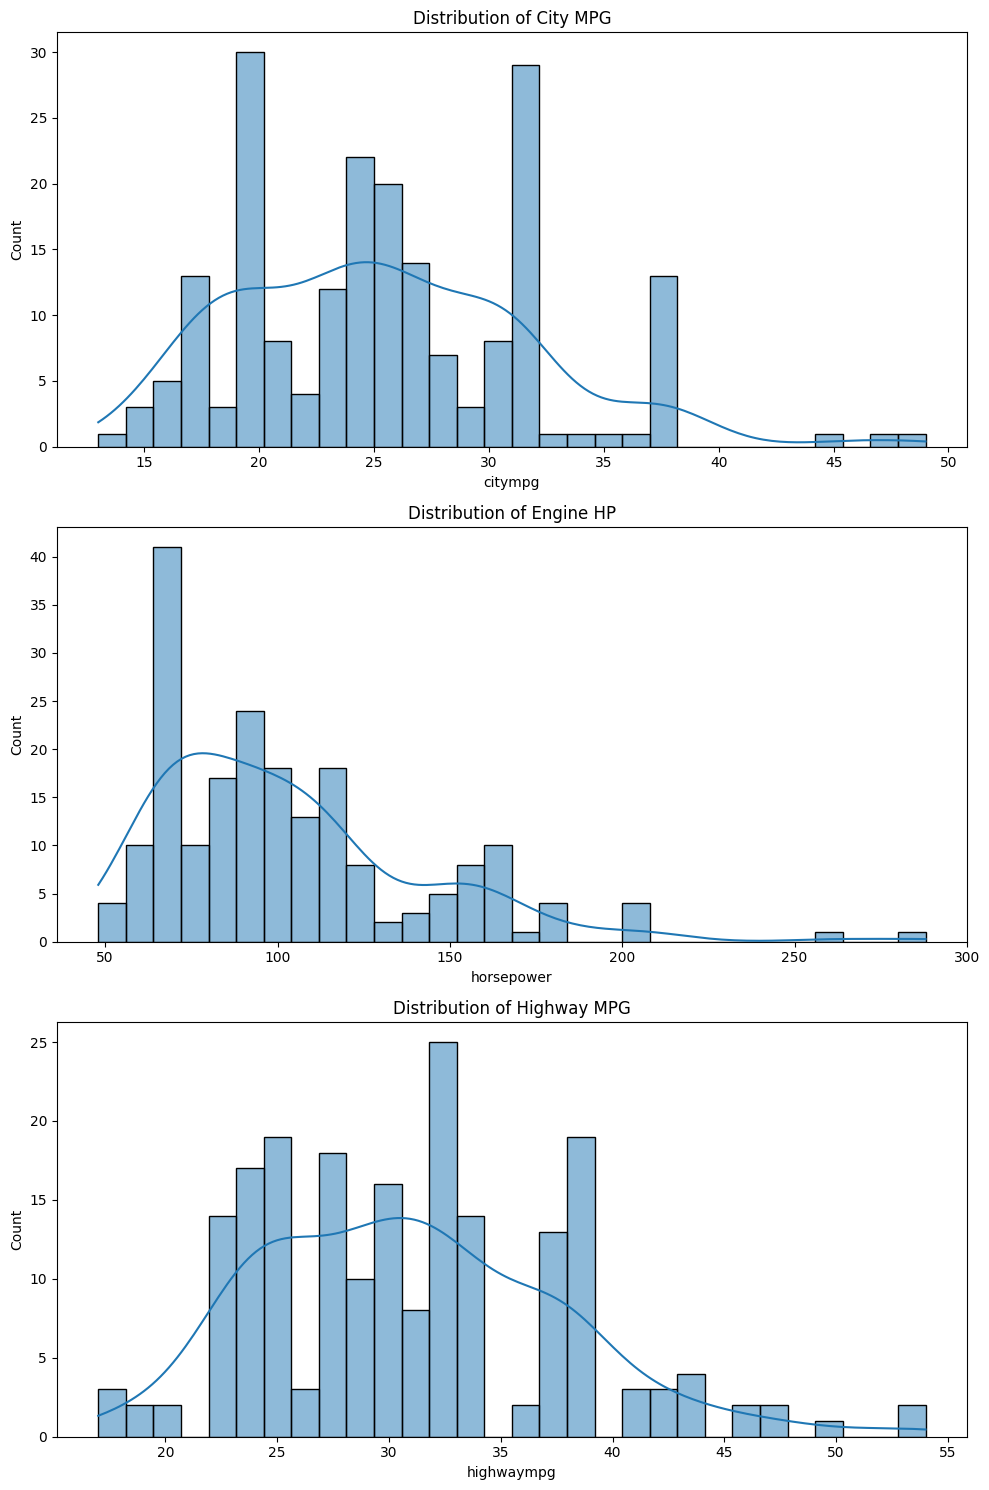

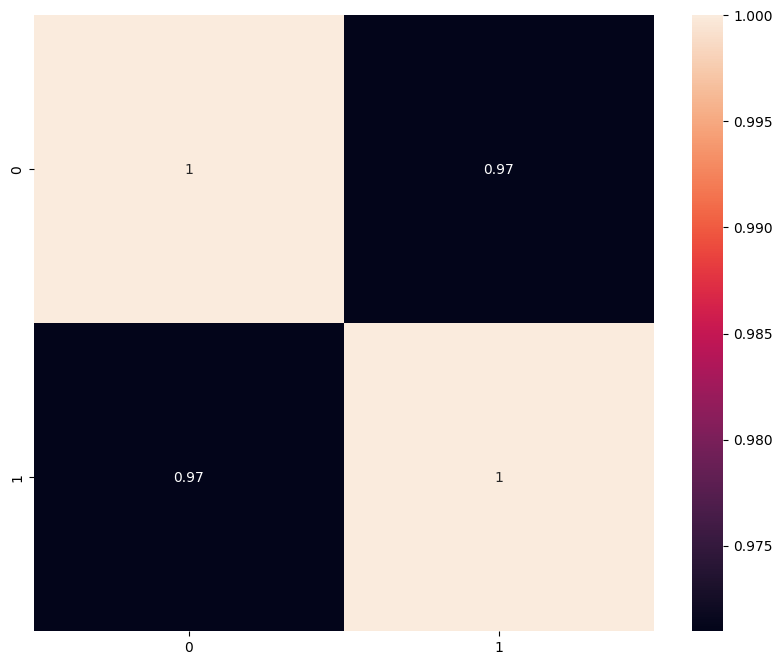

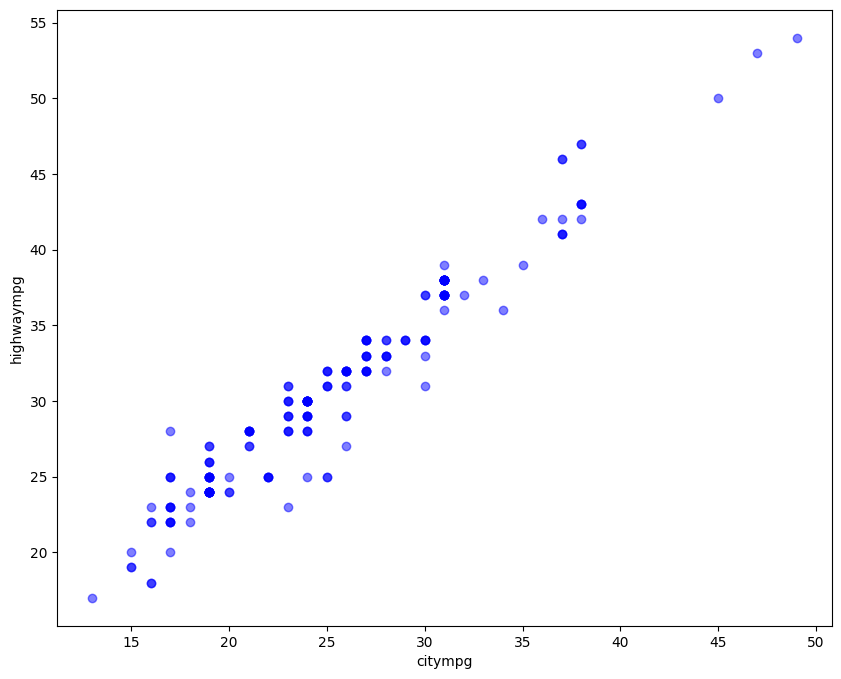

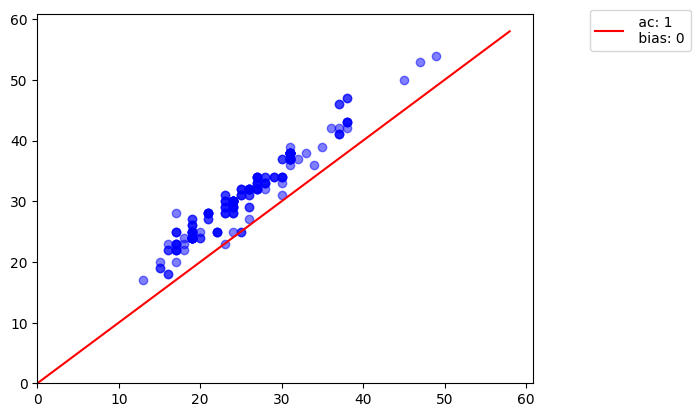

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


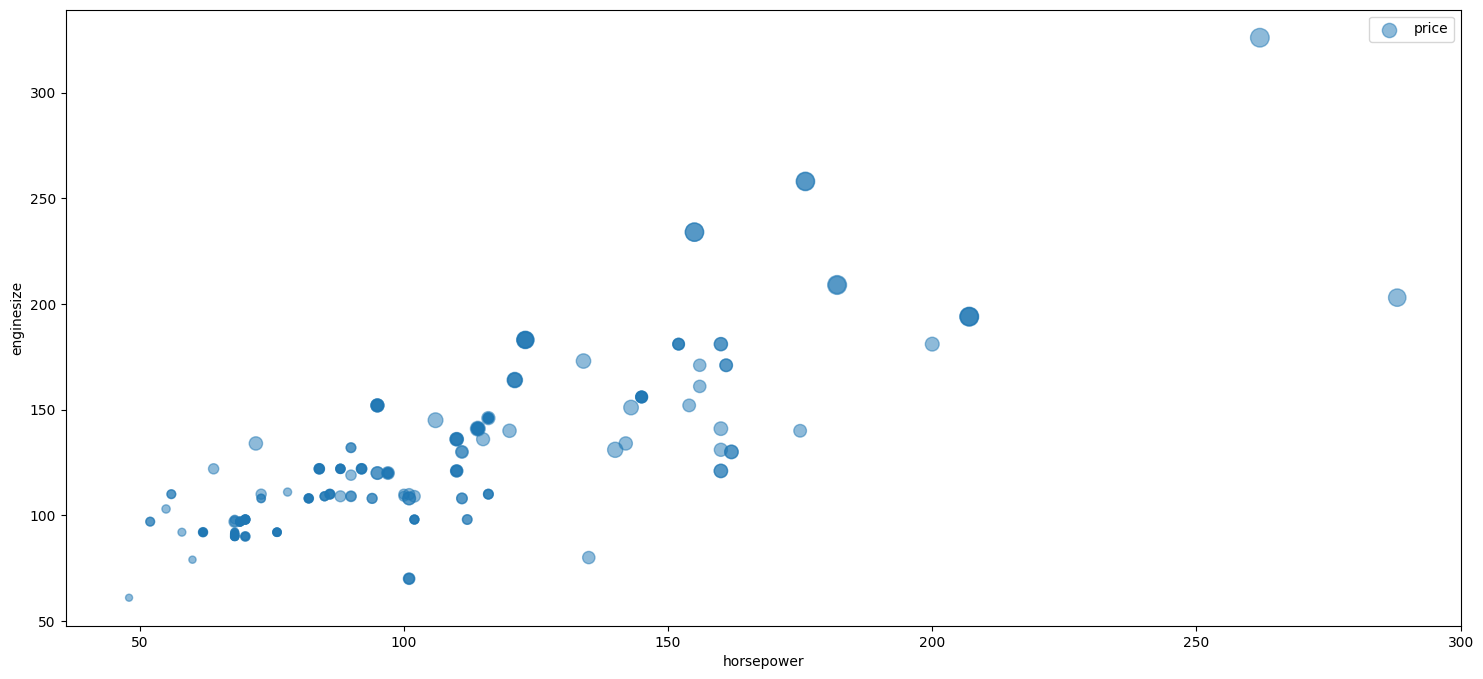

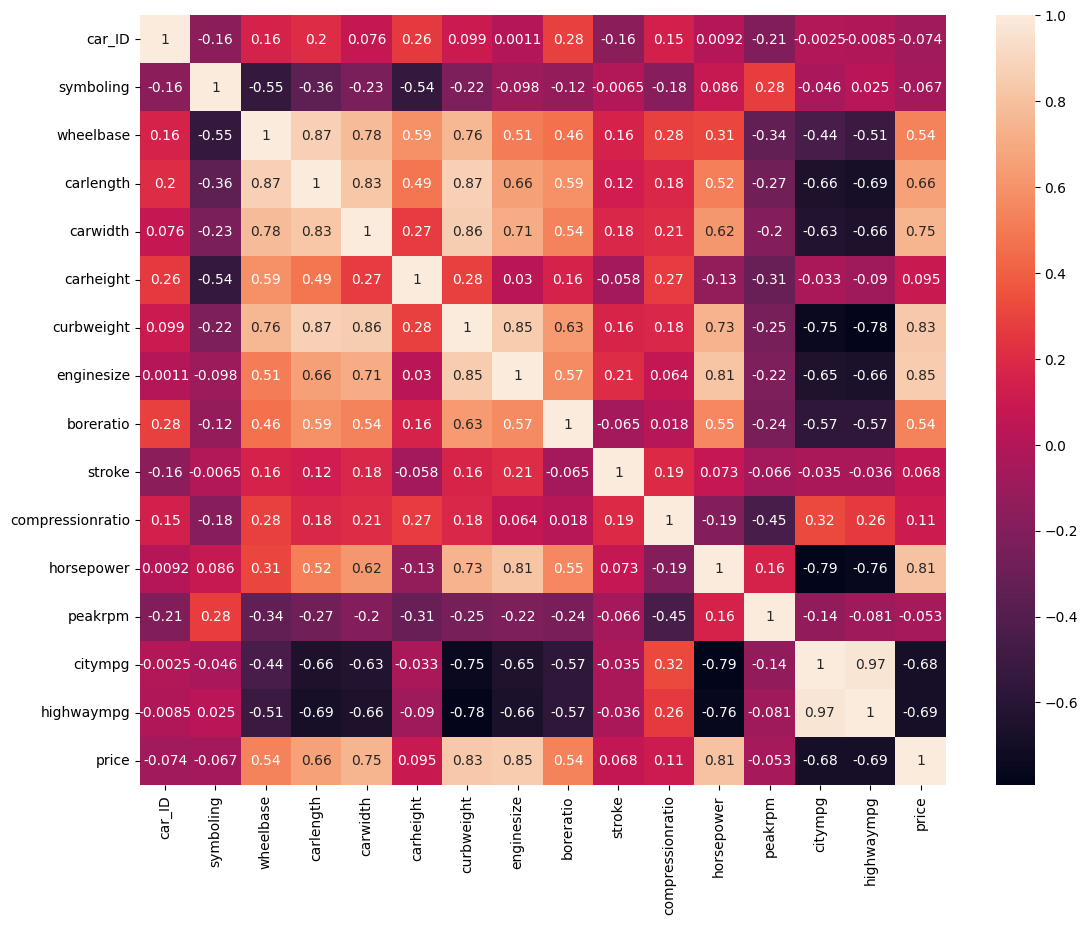

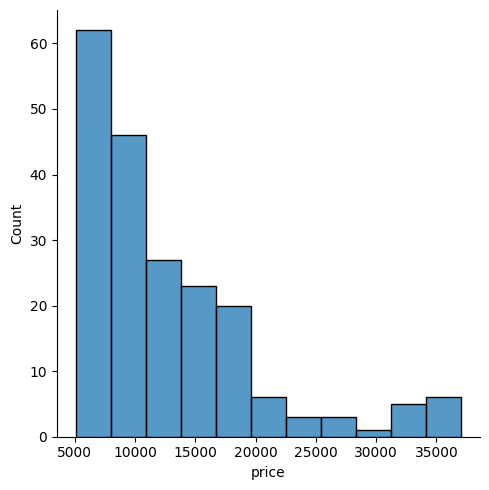

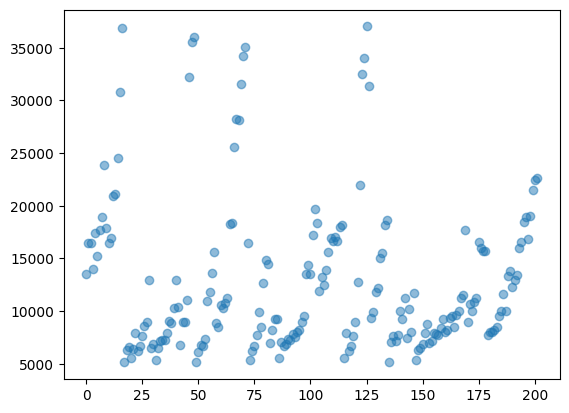

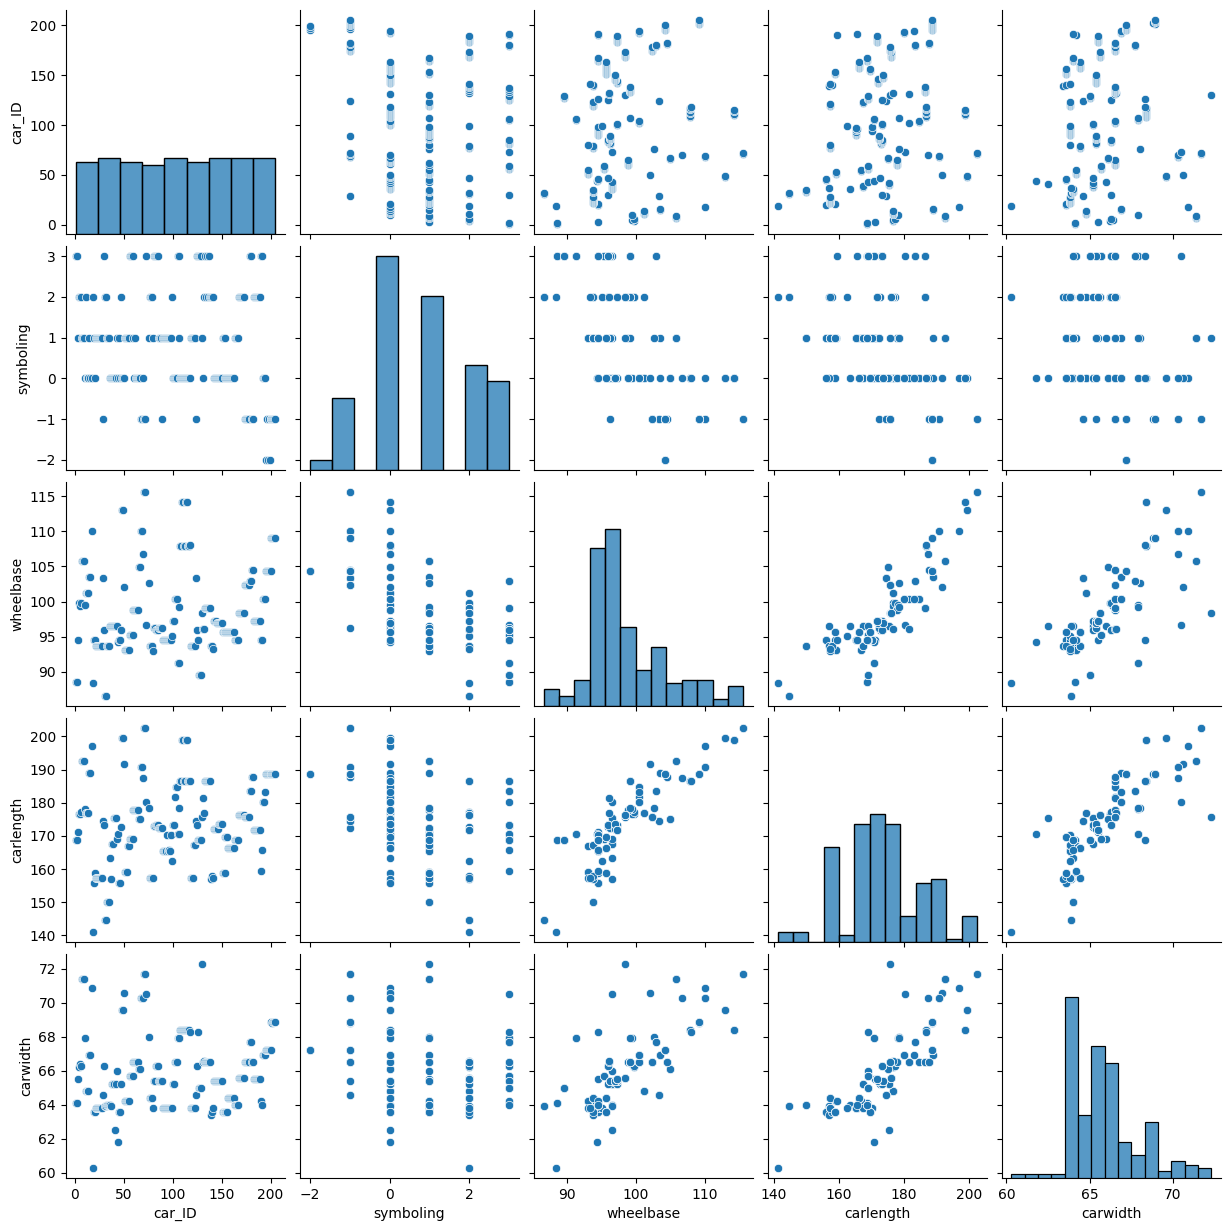

In [6]:
'''
df=pd.read_csv(" https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/carprice/carprice_data.csv")

df_cleaned = df.dropna(axis=0, how='any').dropna(axis=1, how='any') #rimozione valori numeri nulli in righe e colonne

df_cleaned.info()

# Controllo dei valori nulli rimanenti
print("Valori nulli rimanenti:")
print(df_cleaned.isnull().sum())

# Controllo dei valori settati a zero
print("\nValori settati a zero per colonna:")
print((df_cleaned == 0).sum())

# Sostituzione dei valori zero con NaN per trattarli come mancanti (se appropriato)
df_cleaned.replace(0, np.nan, inplace=True)
'''
#importo librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sns

# Caricamento dei dati
data = pd.read_csv('https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/carprice/carprice_data.csv')

# Identificazione degli outlier
outliers = data[(data['price'] > data['price'].mean() + 3*data['price'].std()) | (data['price'] < data['price'].mean() - 3*data['price'].std())]

# Trattamento degli outlier
data = data.drop(outliers.index)

# Identificazione dei valori nulli
null_values = data[data.isnull().any(axis=1)]

# Trattamento dei valori nulli
data = data.dropna()

# Identificazione dei valori settati a zero
zero_values = data[data['price'] == 0]

# Trattamento dei valori settati a zero
data = data[data['price'] != 0]

# Analisi dei dati
print(data.describe())

# Creazione di un histogramma per visualizzare la distribuzione dei prezzi
sns.histplot(data['price'], bins=50)
plt.title('Distribuzione dei prezzi')
plt.xlabel('Prezzo')
plt.ylabel('Frequenza')
plt.show()

#--------------------------------------------------------------------
# Creazione di un boxplot per visualizzare la distribuzione dei prezzi
sns.boxplot(data['price'])
plt.title('Distribuzione dei prezzi')
plt.xlabel('Prezzo')
plt.ylabel('Frequenza')
plt.show()

#--------------------------------------------------------------------

# Creazione di una frequenza per visualizzare la distribuzione dei prezzi
data['price'].value_counts().plot(kind='bar')
plt.title('Frequenza dei prezzi')
plt.xlabel('Prezzo')
plt.ylabel('Frequenza')
plt.show()

#--------------------------------------------------------------------

data.hist(figsize=(20,15))
plt.xlabel("Valore medio case")
plt.ylabel("Case")
plt.title("MedHouse Val Distribution", fontsize=15)
plt.show()

#--------------------------------------------------------------------

ig, axs = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(data['citympg'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Distribution of City MPG')

sns.histplot(data['horsepower'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Engine HP')

sns.histplot(data['highwaympg'], bins=30, kde=True, ax=axs[2])
axs[2].set_title('Distribution of Highway MPG')

plt.tight_layout()
plt.show()

citympg = data["citympg"].to_numpy()
highwaympg = data["highwaympg"].to_numpy()

plt.figure(figsize=(10, 8))
corr = np.corrcoef(citympg, highwaympg)
sns.heatmap(corr, annot=True)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(citympg, highwaympg, color="blue", alpha=0.5, label="datai")
plt.xlabel("citympg")
plt.ylabel("highwaympg")
plt.show()

#--------------------------------------------------------------------

def linear_equation(x: np.ndarray, a: float, b: float) -> np.ndarray:
  y = (a * x) + b
  return y


def plot_linear_regression(ft: np.ndarray, lbs: np.ndarray, a:float, b: float):
  x = np.arange(np.max(ft + 10))
  y = linear_equation(x, a, b)

  labels = " ac: " + str(a)  + "\n bias: " + str(b)
  plt.plot(x, y, color="red", label=labels)
  plt.scatter(ft, lbs, color="blue", alpha=0.5)
  plt.xlim(0)
  plt.ylim(0)
  plt.legend()
  plt.legend(bbox_to_anchor=(1.1, 1.03))
  plt.show()

#--------------------------------------------------------------------

plot_linear_regression(citympg, highwaympg, 1, 0)

data.plot(
    kind='scatter',
    x='horsepower',
    y='enginesize',
    alpha=0.5,
    s=data['price'] / 200,
    label='price',
    figsize=(18, 8),
    #c="CarPrice",
    cmap=plt.get_cmap("jet"),
    sharex=False)
plt.legend()
plt.show()

#----------------------------------------------------------------------

numeric_df = data.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(13, 10))

sns.heatmap(corr_matrix, annot=True)
plt.show()

#-----------------------------------------------------------------------

sns.displot(data["price"])
plt.show()

population = data["price"].to_numpy()

plt.scatter(np.arange(population.size), population, alpha=0.5)
plt.show()

#-----------------------------------------------------------------------

# Seleziona un sottoinsieme di colonne numeriche per il pairplot
subset_columns = numeric_df.columns[:5]  # Sostituisci con le colonne desiderate
subset_df = numeric_df[subset_columns]

# Pairplot per visualizzare le relazioni tra le variabili selezionate
sns.pairplot(subset_df)
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')

for column in df_cleaned:
  if df_cleaned[column].isnull().values.any():
    tmp = df_cleaned[column].to_numpy()
    df_cleaned[column] = imp_mean.fit_transform(tmp)


ValueError: Expected 2D array, got 1D array instead:
array=[ 3.  3.  1.  2.  2.  2.  1.  1.  1. nan  2. nan nan nan  1. nan nan nan
  2.  1. nan  1.  1.  1.  1.  1.  1.  1. -1.  3.  2.  2.  1.  1.  1. nan
 nan nan nan nan nan nan  1. nan  1. nan  2. nan nan nan  1.  1.  1.  1.
  1.  3.  3.  3.  3.  1. nan  1. nan nan nan nan nan -1. -1. nan -1. -1.
  3. nan  1.  1.  2.  2.  2.  1.  3.  3.  3.  3.  3.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  2. nan nan nan nan nan  3.  3.  1. nan
 nan nan nan nan nan nan nan nan nan nan  1.  1.  1.  1.  1. -1.  3.  3.
  3.  3.  3.  1. nan  2.  3.  2.  3.  2.  3.  2.  2.  2.  2. nan nan nan
 nan nan nan nan nan nan  1.  1.  1. nan nan nan nan nan nan nan nan nan
 nan  1.  1.  1.  1.  2.  2.  2.  2.  2.  2. -1. -1. -1. -1. -1.  3.  3.
 -1. -1.  2.  2.  2.  2.  2.  2.  2.  3.  3. nan nan nan -2. -1. -2. -1.
 -2. -1. -1. -1. -1. -1. -1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.